In [6]:
from google.cloud import bigquery

client = bigquery.Client()


In [7]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


# "Will it snow tomorrow?" - The time traveler asked


The following dataset contains climate information form over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 13 years ago. So if today is 2022.02.15 then the weather we want to forecast is for the date 2009.02.16. You are suppsed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to used BigQuery in Jupyter Notebook refer to the Google Docs.

The goal of this test is, to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck at the first part, you can use the replacement data provided in the second part


## Part I

### 1. Task

Change the date format to 'YYYY-MM-DD' and select the data from 2005 till 2009 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [2]:
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.55rows/s]


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,30050,99999,1929,12,28,40.0,4,35.000000,4.0,990.500000,...,NaN,None,0.00,NaN,False,False,False,False,False,False
1,30910,99999,1929,10,27,39.0,4,NaN,NaN,NaN,...,NaN,None,0.08,NaN,False,False,False,False,False,False
2,31590,99999,1929,11,14,36.0,4,33.500000,4.0,999.299988,...,NaN,None,0.00,NaN,False,False,False,False,False,False
3,38640,99999,1929,10,11,58.5,4,53.299999,4.0,1025.599976,...,NaN,None,NaN,NaN,False,False,False,False,False,False
4,37950,99999,1929,10,12,53.5,4,49.000000,4.0,1028.000000,...,NaN,None,0.00,NaN,False,False,False,False,False,False


In [3]:
%%bigquery df
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
WHERE year >= 2005 and year <= 2009 and station_number >= 725300 and station_number <= 726300

Downloading: 100%|██████████| 377784/377784 [00:01<00:00, 227691.83rows/s]


In [4]:
df.head()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,725848,99999,2005,10,16,63.900002,4,48.200001,4.0,1016.099976,...,NaN,None,0.0,NaN,False,False,False,False,False,False
1,725940,99999,2005,10,15,56.500000,4,51.799999,4.0,1014.299988,...,NaN,None,1.0,NaN,False,False,False,False,False,False
2,725848,99999,2005,6,7,56.799999,4,46.900002,4.0,1019.000000,...,NaN,None,0.0,NaN,False,False,False,False,False,False
3,725848,99999,2005,1,30,52.200001,4,44.599998,4.0,1026.099976,...,NaN,None,0.0,NaN,False,False,False,False,False,False
4,725868,99999,2005,12,11,9.300000,5,5.000000,5.0,NaN,...,NaN,None,0.0,5.1,False,False,False,False,False,False


In [5]:
df["date"] = pd.to_datetime(df[["year","month","day"]], format='%Y-%m-%d', errors='ignore')

In [6]:
# reorder columns
df = df.loc[:,['date','station_number', 'wban_number', 'mean_temp',
       'num_mean_temp_samples', 'mean_dew_point', 'num_mean_dew_point_samples',
       'mean_sealevel_pressure', 'num_mean_sealevel_pressure_samples',
       'mean_station_pressure', 'num_mean_station_pressure_samples',
       'mean_visibility', 'num_mean_visibility_samples', 'mean_wind_speed',
       'num_mean_wind_speed_samples', 'max_sustained_wind_speed',
       'max_gust_wind_speed', 'max_temperature', 'max_temperature_explicit',
       'min_temperature', 'min_temperature_explicit', 'total_precipitation',
       'snow_depth', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado', 'year', 'month', 'day']]

In [7]:
df = df.sort_values(by=["date"])

In [8]:
df.tail()

,date,station_number,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,...,snow_depth,fog,rain,snow,hail,thunder,tornado,year,month,day
315468,2009-12-31,725350,14848,31.200001,24,28.799999,24.0,1015.200012,18.0,NaN,...,3.1,False,False,False,False,False,False,2009,12,31
240000,2009-12-31,725626,24091,26.500000,24,16.900000,24.0,1022.099976,24.0,NaN,...,NaN,False,False,False,False,False,False,2009,12,31
163823,2009-12-31,725869,99999,25.700001,8,17.600000,8.0,NaN,NaN,NaN,...,NaN,False,False,False,False,False,False,2009,12,31
328434,2009-12-31,725345,14834,30.100000,24,26.900000,24.0,NaN,NaN,NaN,...,NaN,False,False,False,False,False,False,2009,12,31
361163,2009-12-31,725317,53802,30.799999,24,29.100000,24.0,1017.900024,14.0,NaN,...,NaN,False,False,False,False,False,False,2009,12,31



### 2. Task

From here want to work with the data from all stations 725300 to 725330 that have information from 2005 till 2009.

Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate.


In [9]:
df = df[df["station_number"]<=725330]

In [10]:
pd.set_option('display.max_columns', None)

##### I remove the following features as they contain only nans

In [11]:
df = df.drop(["min_temperature","min_temperature_explicit"],axis=1)

In [12]:
df.describe()

,station_number,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,total_precipitation,snow_depth,year,month,day
count,18129.000000,18129.000000,18129.000000,18129.000000,18127.000000,18127.000000,16291.000000,16291.000000,993.000000,993.000000,18126.000000,18126.000000,18124.000000,18124.000000,18119.000000,11468.000000,18127.000000,17938.000000,565.000000,18129.000000,18129.000000,18129.000000
mean,725316.962050,72766.474488,51.999636,23.574163,41.605108,23.553704,1016.937585,21.682217,990.766767,23.309164,8.699388,23.565155,7.495834,23.528195,14.049412,23.153270,42.580692,0.095488,2.865133,2007.001103,6.527884,15.721000
std,8.979529,39561.090384,19.392603,1.817230,18.494937,1.857548,6.920370,3.198832,7.302087,2.276299,1.730177,1.829544,3.581758,1.928344,5.241219,6.382058,18.646582,0.279290,2.105886,1.413667,3.451484,8.803705
min,725300.000000,3887.000000,-16.200001,4.000000,-23.500000,4.000000,985.299988,4.000000,967.599976,4.000000,0.600000,4.000000,0.000000,4.000000,2.900000,11.100000,-34.599998,0.000000,1.200000,2005.000000,1.000000,1.000000
25%,725314.000000,14842.000000,36.299999,24.000000,27.500000,24.000000,1012.799988,20.000000,986.400024,24.000000,7.900000,24.000000,4.800000,24.000000,9.900000,18.100000,28.400000,0.000000,1.200000,2006.000000,4.000000,8.000000
50%,725316.000000,99999.000000,53.799999,24.000000,42.599998,24.000000,1016.700012,23.000000,990.700012,24.000000,9.500000,24.000000,7.000000,24.000000,13.000000,22.000000,44.099998,0.000000,2.000000,2007.000000,7.000000,16.000000
75%,725326.000000,99999.000000,69.099998,24.000000,57.200001,24.000000,1020.900024,24.000000,995.000000,24.000000,10.000000,24.000000,9.600000,24.000000,16.900000,27.000000,57.900002,0.040000,3.900000,2008.000000,10.000000,23.000000
max,725330.000000,99999.000000,92.000000,24.000000,79.099998,24.000000,1044.199951,24.000000,1017.099976,24.000000,10.900000,24.000000,24.000000,24.000000,49.000000,63.900002,87.800003,9.990000,13.000000,2009.000000,12.000000,31.000000


In [13]:
df.station_number.unique()

array([725326, 725314, 725305, 725327, 725330, 725315, 725316, 725300,
       725320, 725317])

##### We are looking at weather data from 10 weather stations only.

In [14]:
df.num_mean_temp_samples.unique()

array([24, 23, 13, 18, 16, 19, 21, 22, 10,  7,  6, 17, 11, 14,  5, 20, 15,
        8,  9, 12,  4])

##### I delete the following features because I think they are redundant for the prediction of weather; i.a. all features indicating the number of samples as this should not influence weather.

In [15]:
df = df.drop(["wban_number","num_mean_temp_samples","num_mean_dew_point_samples","num_mean_sealevel_pressure_samples", "num_mean_wind_speed_samples","num_mean_station_pressure_samples", "num_mean_visibility_samples"],axis=1)

In [16]:
df.head()

,date,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_station_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,max_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,year,month,day
200705,2005-01-01,725326,29.400000,20.100000,NaN,NaN,10.0,9.7,18.1,22.0,21.200001,False,0.00,NaN,False,False,False,False,False,False,2005,1,1
89137,2005-01-01,725314,53.799999,52.400002,1023.799988,NaN,4.3,4.1,9.9,NaN,48.000000,False,0.36,NaN,False,False,False,False,False,False,2005,1,1
273658,2005-01-01,725305,30.900000,21.799999,1028.699951,NaN,10.0,8.6,14.0,NaN,21.000000,False,0.00,NaN,False,False,False,False,False,False,2005,1,1
270291,2005-01-01,725327,34.200001,27.400000,1028.199951,NaN,9.8,7.6,14.0,NaN,28.000000,False,0.00,NaN,True,True,True,True,True,True,2005,1,1
250595,2005-01-01,725330,38.400002,32.599998,1027.800049,NaN,9.2,7.9,15.9,NaN,30.000000,False,0.08,NaN,True,True,True,True,True,True,2005,1,1


##### I delete the feature "mean_station_pressure" as well as it has a lot of missing values (only 993 data points available for 16291 observations). I leave snow_depth of course as here the missing values are by design (no snow depth available for days without snow). 

In [17]:
df = df.drop(["mean_station_pressure"],axis=1)

I drop further unimportant variables and fill missing values for total precipitation and snow depth.

In [ ]:
df = df.drop(["max_temperature_explicit","max_sustained_wind_speed", "max_gust_wind_speed","mean_sealevel_pressure"], axis=1)

df.total_precipitation = df.total_precipitation.fillna(0)
df.snow_depth = df.snow_depth.fillna(0)

In [19]:
df.isnull().sum()

date                   0
station_number         0
mean_temp              0
mean_dew_point         2
mean_visibility        3
mean_wind_speed        5
max_temperature        2
total_precipitation    0
snow_depth             0
fog                    0
rain                   0
snow                   0
hail                   0
thunder                0
tornado                0
year                   0
month                  0
day                    0
dtype: int64

In [20]:
df[df.isnull().any(axis=1)]

,date,station_number,mean_temp,mean_dew_point,mean_visibility,mean_wind_speed,max_temperature,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,year,month,day
240842,2006-01-31,725327,32.000000,28.200001,8.5,6.6,NaN,0.00,0.0,False,False,False,False,False,False,2006,1,31
142051,2006-06-03,725305,64.900002,NaN,10.0,1.7,62.599998,0.01,0.0,False,False,False,False,False,False,2006,6,3
184740,2006-07-11,725327,73.400002,71.599998,3.6,NaN,NaN,0.00,0.0,False,False,False,False,False,False,2006,7,11
335987,2006-07-19,725326,66.199997,63.000000,NaN,5.4,59.000000,0.00,0.0,False,False,False,False,False,False,2006,7,19
63090,2006-07-20,725326,71.099998,68.000000,NaN,5.2,68.000000,0.84,0.0,False,False,False,False,False,False,2006,7,20
168410,2006-07-21,725326,69.300003,66.699997,NaN,3.0,66.199997,0.00,0.0,False,False,False,False,False,False,2006,7,21
4501,2006-09-15,725327,63.099998,56.700001,5.1,NaN,51.799999,0.00,0.0,True,True,True,True,True,True,2006,9,15
64372,2007-10-20,725314,60.599998,39.500000,10.0,NaN,42.099998,0.00,0.0,False,False,False,False,False,False,2007,10,20
258271,2007-12-11,725326,30.600000,28.900000,3.8,NaN,26.600000,0.05,0.0,False,False,False,False,False,False,2007,12,11
137053,2008-05-08,725316,56.500000,NaN,7.4,12.0,50.000000,0.42,0.0,False,False,False,False,False,False,2008,5,8


### Some descriptive statistics to better understand the data

In [21]:
print(5*365*10)
print(len(df))

18250
18129


Almost all of the 10 weather stations have daily data.

In [31]:
df["datetime"]=pd.to_datetime(df["date"])

We plot the mean temperature in time for one exemplary weather station (725315) :

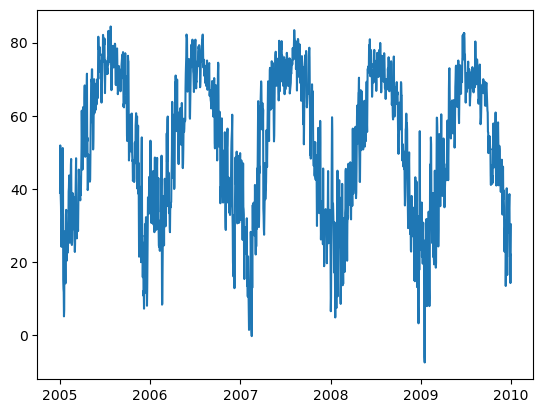

In [36]:
plt.plot(df2[df2["station_number"]==725315]["datetime"],df2[df2["station_number"]==725315]["mean_temp"])

We can clearly recognize a yearly seasonality. 
Snow should only be possible when mean_temp is more or less below 32 degrees F. 

### Build dataset as weather variables of previous days
As we have temporal data here and we cannot include the weather features of day t in the prediction of snow for day t, we have to re-build the dataset. I assume that there are several ways of doing that; I decide to use the previous days' weather features for the prediction of snow for the following day. I decide to include weather information for the last 5 days, but several approaches are possible here. 

In [26]:
df_raw = df # save original df

weather_features = ['mean_temp', 'mean_dew_point',
       'mean_visibility', 'mean_wind_speed', 'max_temperature',
       'total_precipitation', 'snow_depth', 'fog', 'rain', 'snow', 'hail',
       'thunder', 'tornado','date',"station_number"] # last 2 features need to stay for merging

# create time delta
from datetime import timedelta
df["t-1"] = pd.to_datetime(df.date) - timedelta(days=1)
df["t-2"] = pd.to_datetime(df.date) - timedelta(days=2)
df["t-3"] = pd.to_datetime(df.date) - timedelta(days=3)
df["t-4"] = pd.to_datetime(df.date) - timedelta(days=4)
df["t-5"] = pd.to_datetime(df.date) - timedelta(days=5)

#for day in ["t-1","t-2","t-3","t-4","t-5"]:
 #   df[day] = df[day].dt.strftime("%Y-%m-%d")
    
for day in ["t-1","t-2","t-3","t-4","t-5"]:
    df = pd.merge(df, df_raw[weather_features], left_on=[day,"station_number"],
                  right_on=["date","station_number"], 
                  suffixes=("","_"+day),how="inner")

In [29]:
# now we delete the weather columns for the specific day t    

df = df.drop(['mean_temp', 'mean_dew_point', 'mean_visibility', 'mean_wind_speed', 'max_temperature',
       'total_precipitation', 'snow_depth', 'fog', 'rain', 'hail',
       'thunder', 'tornado'],axis=1)
df = df.drop(["t-1", "t-2", "t-3", "t-4", "t-5", "date_t-1", "date_t-2", 
              "date_t-3", "date_t-4", "date_t-5"],axis=1)

I convert the weather station feature from numerical to string and later one-hot encode it, so that my model does not try to size a relationship between the station number and probability of snow. 

In [30]:
df["station_number"] = df["station_number"].astype(str)

## Task 3: Split data in train and test set. 

NB.: I create my validation set as part of the training set separately when optimizing hyperparameters via Bayesian Optimization later. 

In [41]:
import datetime as dt
str(dt.datetime.today()- dt.timedelta(days=13*365)).split(' ')[0]

'2009-10-30'

So I should predict snow fall for the day of 30th October 2009.
As we are looking at time-dependent data, I decide for sequential splitting; my cut-off between train and test set is the 30th October 2009, with this date being the first to enter the test set. This results in a test set with 622 observations, i.e. data for 10 stations for 62 days. 
Of course, to answer the question of whether it will snow on the 30th October 2009, I could only include this day in my test set, but for evaluation metrics it is beneficial to have more data. 

I delete the day and year features and leave only the feature month as I believe the month being an important indicator of the prob of snow.

In [32]:
X_train = df[df["date"]<"2009-10-30"].drop(["snow","date","day","year"], axis=1)
y_train = df[df.date<"2009-10-30"]["snow"]
X_test  = df[df["date"]>="2009-10-30"].drop(["snow","date","day","year"], axis=1)
y_test  = df[df.date>="2009-10-30"]["snow"]

In [33]:
X_test.head()

,station_number,month,mean_temp_t-1,mean_dew_point_t-1,mean_visibility_t-1,mean_wind_speed_t-1,max_temperature_t-1,total_precipitation_t-1,snow_depth_t-1,fog_t-1,rain_t-1,snow_t-1,hail_t-1,thunder_t-1,tornado_t-1,mean_temp_t-2,mean_dew_point_t-2,mean_visibility_t-2,mean_wind_speed_t-2,max_temperature_t-2,total_precipitation_t-2,snow_depth_t-2,fog_t-2,rain_t-2,snow_t-2,hail_t-2,thunder_t-2,tornado_t-2,mean_temp_t-3,mean_dew_point_t-3,mean_visibility_t-3,mean_wind_speed_t-3,max_temperature_t-3,total_precipitation_t-3,snow_depth_t-3,fog_t-3,rain_t-3,snow_t-3,hail_t-3,thunder_t-3,tornado_t-3,mean_temp_t-4,mean_dew_point_t-4,mean_visibility_t-4,mean_wind_speed_t-4,max_temperature_t-4,total_precipitation_t-4,snow_depth_t-4,fog_t-4,rain_t-4,snow_t-4,hail_t-4,thunder_t-4,tornado_t-4,mean_temp_t-5,mean_dew_point_t-5,mean_visibility_t-5,mean_wind_speed_t-5,max_temperature_t-5,total_precipitation_t-5,snow_depth_t-5,fog_t-5,rain_t-5,snow_t-5,hail_t-5,thunder_t-5,tornado_t-5
17162,725317,10,55.299999,52.099998,8.4,7.8,48.200001,0.0,0.0,False,False,False,False,False,False,53.099998,51.299999,5.0,3.2,50.000000,0.02,0.0,False,False,False,False,False,False,50.500000,49.400002,4.7,5.6,48.000000,0.00,0.0,False,False,False,False,False,False,57.000000,44.500000,10.0,6.5,50.000000,0.00,0.0,False,False,False,False,False,False,52.500000,40.400002,10.0,7.8,44.599998,0.00,0.0,False,False,False,False,False,False
17163,725330,10,50.900002,46.099998,6.6,4.4,39.200001,0.0,0.0,True,True,True,True,True,True,54.400002,50.000000,4.2,3.8,48.900002,0.12,0.0,False,False,False,False,False,False,53.099998,46.000000,7.5,3.9,39.000000,0.16,0.0,False,False,False,False,False,False,51.799999,38.400002,10.0,4.2,35.099998,0.00,0.0,False,False,False,False,False,False,45.799999,37.599998,10.0,5.8,35.599998,0.04,0.0,False,False,False,False,False,False
17164,725305,10,55.200001,48.700001,6.8,6.7,51.099998,0.0,0.0,False,False,False,False,False,False,53.500000,48.700001,5.2,2.6,50.000000,0.04,0.0,False,False,False,False,False,False,49.400002,44.400002,7.3,4.9,42.799999,0.09,0.0,False,False,False,False,False,False,53.099998,49.799999,6.6,6.3,51.799999,0.27,0.0,False,False,False,False,False,False,50.200001,42.500000,9.9,4.8,41.000000,0.04,0.0,False,False,False,False,False,False
17165,725316,10,54.700001,50.799999,8.0,8.4,48.200001,0.0,0.0,False,False,False,False,False,False,53.400002,50.500000,6.0,3.9,51.799999,0.37,0.0,False,False,False,False,False,False,48.900002,47.099998,4.4,5.2,46.400002,0.07,0.0,False,False,False,False,False,False,54.599998,47.400002,9.3,6.9,51.099998,0.05,0.0,False,False,False,False,False,False,53.299999,41.700001,10.0,7.3,43.000000,0.00,0.0,False,False,False,False,False,False
17166,725314,10,52.400002,50.200001,7.1,7.7,46.400002,0.0,0.0,False,False,False,False,False,False,53.700001,51.599998,6.5,3.3,51.099998,0.53,0.0,False,False,False,False,False,False,49.599998,47.799999,6.2,4.2,48.200001,0.13,0.0,False,False,False,False,False,False,54.799999,49.099998,9.3,5.0,50.000000,0.11,0.0,False,False,False,False,False,False,54.099998,43.200001,10.0,4.5,46.000000,0.00,0.0,False,False,False,False,False,False


In [34]:
# One-hot encoding for the station feature

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

## Part II : Training a machine learning model

I decided to train a Gradient Boosting Model and due to lack of time I unfortunately could not compare it to other models. I have had the best experience with the LightGBM package introduced by Microsoft a few years back, as it provides good results with the lowest running time. 

In [41]:
%pip install lightgbm

  Using cached lightgbm-3.3.3-py3-none-manylinux1_x86_64.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [38]:
%pip install bayes-optimization

ERROR: Could not find a version that satisfies the requirement bayes-optimization (from versions: none)
ERROR: No matching distribution found for bayes-optimization
Note: you may need to restart the kernel to use updated packages.


In [42]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn import datasets, metrics, model_selection, svm

from sklearn.metrics import confusion_matrix

In [37]:
from bayes_opt import BayesianOptimization
from skopt import BayesSearchCV 
import warnings

ModuleNotFoundError: No module named 'bayes_opt'


### Hyperparameter Tuning

In this section I want to find the optimal parameters for the Light GBM Model Fit that follows.


In [36]:
warnings.simplefilter(action='ignore', category=FutureWarning)
X = X_train
y = y_train
def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6,n_estimators=10000, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample):
        params = {'application':'binary', 'metric':'auc'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc'])
        return max(cv_result['auc-mean'])
    # specifying in which interval parameters should be tested 
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (20, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 30),
                                            'max_bin':(50,120),
                                            'min_data_in_leaf': (80, 180),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=200)

    #n_iter: Number of steps of bayesian optimization to perform. The more steps the more likely to find a good maximum
    #init_points: Number of steps of random exploration to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X_train, y_train, init_round=5, opt_round=10, n_folds=3, random_seed=6,n_estimators=10000)


opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='binary'
opt_params[1]['metric']='auc'
opt_params[1]['is_unbalance']=False
opt_params[1]['boost_from_average']=False
opt_params=opt_params[1]
opt_params

ModuleNotFoundError: No module named 'bayes_opt'

Unfortunately, as I was not able to install bayes-optimization here on the Google Cloud, I did this part on my local machine and can only copy-paste the results here: 

The optimal parameters are:
    'bagging_fraction': 0.9280786928822388,
 'feature_fraction': 0.5869250335390612,
 'learning_rate': 0.11437976620936573,
 'max_bin': 118,
 'max_depth': 24,
 'min_data_in_leaf': 148,
 'min_sum_hessian_in_leaf': 32.93481038105413,
 'num_leaves': 22,
 'subsample': 0.805623782185316,
 'objective': 'binary',
 'metric': 'auc',
 'is_unbalance': False,
 'boost_from_average': False
 
 I will now use those parameters for my model.

In [43]:
clf_train = lgb.LGBMClassifier(bagging_fraction= 0.928, #early_stopping=5,
 feature_fraction= 0.58, extra_trees=True, learning_rate= 0.11, max_bin= 118, 
 max_depth= 24, min_data_in_leaf= 148, min_sum_hessian_in_leaf= 33,
 num_leaves= 22, subsample= 0.8056, objective= 'binary',lambda_l1=0.1,lambda_l2=0.1,
 metric= 'auc', is_unbalance= True, boost_from_average= False,
 boosting_type= "dart", xgboost_dart_mode=True, drop_rate=0.13)
clf_train.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.58, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.58
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.928, subsample=0.8056 will be ignored. Current value: bagging_fraction=0.928
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=33, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=33
[LightGBM] [Warning] min_data_in_leaf is set=148, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=148


LGBMClassifier(bagging_fraction=0.928, boost_from_average=False,
               boosting_type='dart', drop_rate=0.13, extra_trees=True,
               feature_fraction=0.58, is_unbalance=True, lambda_l1=0.1,
               lambda_l2=0.1, learning_rate=0.11, max_bin=118, max_depth=24,
               metric='auc', min_data_in_leaf=148, min_sum_hessian_in_leaf=33,
               num_leaves=22, objective='binary', subsample=0.8056,
               xgboost_dart_mode=True)

<AxesSubplot:>

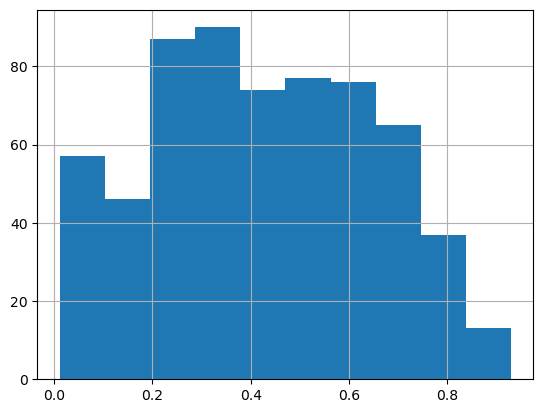

In [44]:
y_pred_test = clf_train.predict_proba(X_test)
y_pred_test = y_pred_test[:,1]

# histogram of predicted probabilities of snow:
pd.Series(y_pred_test).hist()


## Results and Evaluation metrics

### Results:  Prediction of snow for the 30th October 2009
Let's first take a look at the performance of the model for the day of 30th October 2009. I use a probability cut-off of 0.5 here, but discuss this later when looking at evaluation metrics. 

In [46]:
results = pd.DataFrame()
results["true"] = y_test
results["prediction_probability"] = y_pred_test
results["prediction"] = y_pred_test.round(0)
results["station"] = df["station_number"]
results["date"] = df["date"]    

results.head(10)

,true,prediction_probability,prediction,station,date
17162,False,0.295808,0.0,725317,2009-10-30
17163,False,0.693114,1.0,725330,2009-10-30
17164,False,0.330808,0.0,725305,2009-10-30
17165,False,0.261459,0.0,725316,2009-10-30
17166,False,0.296367,0.0,725314,2009-10-30
17167,False,0.499482,0.0,725327,2009-10-30
17168,False,0.301377,0.0,725320,2009-10-30
17169,False,0.459626,0.0,725315,2009-10-30
17170,False,0.272925,0.0,725300,2009-10-30
17171,False,0.032889,0.0,725326,2009-10-30



 We managed to predict snow/ no snow correctly for 9 out of 10 weather stations for the day of 30th October 2009. While we predicted snow for station number 725330, it didn't actually snow at any of them.

### Evaluation metrics : 
Let's now have a look at the performance of prediction for the remaining two months in our dataset (November and December 2009).


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 200x200 with 0 Axes>

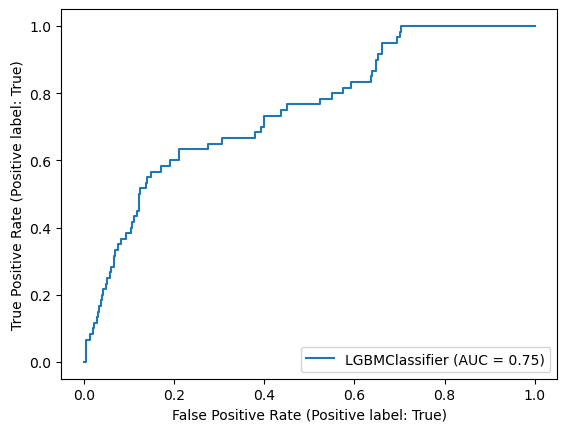

In [47]:
plt.figure(figsize=(2,2))
roc_auc_score(y_test, y_pred_test)
metrics.plot_roc_curve(clf_train, X_test, y_test)  
plt.show() 

In [49]:
confusion_matrix(results["true"], results["prediction"])

array([[357, 205],
       [ 20,  40]])


We have an area under the curve of 0.75 and with a cutoff of 0.5 we have a True Positive Rate (or sensitivity/recall) of 40/60 = 66,67% and a True Negative Rate (specificity) of 357/562 = 63,5%.

The ideal cutoff value (here chosen to be 0.5 for simplicity) depends on the ratio of the TPR we want and the TNR we are ready to accept, because it is a trade-off : If we want to increase TPR, our FPR will also increase eventually.

## Feature importance

In [50]:
feats = pd.Series(clf_train.feature_importances_, X_train.columns)

feats.sort_values(ascending=False).iloc[:20]

month                    91
mean_dew_point_t-1       88
fog_t-3                  80
mean_wind_speed_t-1      70
fog_t-4                  68
fog_t-5                  66
station_number_725330    64
station_number_725320    61
mean_wind_speed_t-5      60
fog_t-2                  60
mean_temp_t-1            58
fog_t-1                  57
station_number_725314    54
mean_dew_point_t-5       53
station_number_725327    48
mean_wind_speed_t-2      48
mean_temp_t-3            48
mean_wind_speed_t-3      46
station_number_725326    44
mean_dew_point_t-2       43
dtype: int32

It's not a good sign that some weather features for days that date back longer are more important to the model than some weather features that date back less. This seems to be random noise. As an outlook for further work on this topic, I would investigate the possibility to discount time lags in the model. 